In [143]:
import pandas as pd
import numpy as np

In [144]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, BayesianRidge, LinearRegression
from sklearn.metrics import accuracy_score

In [145]:
import matplotlib.pyplot as plt

In [146]:
df = pd.read_csv('/content/drive/MyDrive/Video Games Sales Data and Model/vgsales.csv')

In [147]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [148]:
df.shape

(16598, 11)

In [149]:
df = df.drop(columns = 'Rank')

In [150]:
df.shape

(16598, 10)

In [151]:
#Checking for NaNs in each column
for col in df.columns:
  missing_percentage = ((df[col].isna().sum())/df.shape[0])*100
  print(f"{col} has {missing_percentage:.2f}% missing values")

Name has 0.00% missing values
Platform has 0.00% missing values
Year has 1.63% missing values
Genre has 0.00% missing values
Publisher has 0.35% missing values
NA_Sales has 0.00% missing values
EU_Sales has 0.00% missing values
JP_Sales has 0.00% missing values
Other_Sales has 0.00% missing values
Global_Sales has 0.00% missing values


In [152]:
#droping all NaNs in the Dataframe
df = df.dropna()

In [153]:
df.shape

(16291, 10)

In [154]:
#Selecting Categorical columns from the Dataframe
cat_df = df.select_dtypes(include=object)

In [155]:
cat_df.head()

,Name,Platform,Genre,Publisher
0,Wii Sports,Wii,Sports,Nintendo
1,Super Mario Bros.,NES,Platform,Nintendo
2,Mario Kart Wii,Wii,Racing,Nintendo
3,Wii Sports Resort,Wii,Sports,Nintendo
4,Pokemon Red/Pokemon Blue,GB,Role-Playing,Nintendo


In [156]:
cat_df.shape

(16291, 4)

In [157]:
cat_col = cat_df.columns.to_list()

In [158]:
print(cat_col)

['Name', 'Platform', 'Genre', 'Publisher']


In [161]:
#Encoding Categorical columns
encod_hot = OneHotEncoder(sparse_output=False)

In [176]:
le_encod = LabelEncoder()

In [177]:
for col in cat_col:
  encoded = le_encod.fit_transform(df[col])
  df[f"'{col}_encoded'"] = list(encoded)

In [178]:
df.shape

(16291, 14)

In [179]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,'Name_encoded','Platform_encoded','Genre_encoded','Publisher_encoded'
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,10849,26,10,359
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,9201,11,4,359
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,5493,26,6,359
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,10851,26,10,359
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,7247,5,7,359


In [180]:
#Dropping Original Categorical Columns
df = df.drop(columns=cat_col)

In [181]:
df.head()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,'Name_encoded','Platform_encoded','Genre_encoded','Publisher_encoded'
0,2006.0,41.49,29.02,3.77,8.46,82.74,10849,26,10,359
1,1985.0,29.08,3.58,6.81,0.77,40.24,9201,11,4,359
2,2008.0,15.85,12.88,3.79,3.31,35.82,5493,26,6,359
3,2009.0,15.75,11.01,3.28,2.96,33.00,10851,26,10,359
4,1996.0,11.27,8.89,10.22,1.00,31.37,7247,5,7,359


In [182]:
#Scaling Numerical Data
num_df = df.select_dtypes(include=np.number)

In [183]:
num_col = num_df.columns.to_list()

In [184]:
print(num_col)

['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', "'Name_encoded'", "'Platform_encoded'", "'Genre_encoded'", "'Publisher_encoded'"]


In [185]:
from sklearn.preprocessing import RobustScaler, StandardScaler

In [190]:
scaler = StandardScaler()

In [187]:
from sklearn import set_config

In [188]:
set_config(transform_output="pandas")

In [196]:
drop = ['Name_encoded', 'Year']

In [198]:
df.head()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,'Name_encoded','Platform_encoded','Genre_encoded','Publisher_encoded'
0,2006.0,41.49,29.02,3.77,8.46,82.74,10849,26,10,359
1,1985.0,29.08,3.58,6.81,0.77,40.24,9201,11,4,359
2,2008.0,15.85,12.88,3.79,3.31,35.82,5493,26,6,359
3,2009.0,15.75,11.01,3.28,2.96,33.00,10851,26,10,359
4,1996.0,11.27,8.89,10.22,1.00,31.37,7247,5,7,359


In [199]:
#Setting X and y
x_list = ['Platform_encoded', 'Genre_encoded', 'Publisher_encoded', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']

In [203]:
df.shape

(16291, 10)

In [206]:
df.columns[0]

'Year'

In [210]:
np.arange(1,9)

array([1, 2, 3, 4, 5, 6, 7, 8])

In [217]:
X = df.iloc[:, np.arange(1,9)]

In [219]:
X.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,'Name_encoded','Platform_encoded','Genre_encoded'
0,41.49,29.02,3.77,8.46,82.74,10849,26,10
1,29.08,3.58,6.81,0.77,40.24,9201,11,4
2,15.85,12.88,3.79,3.31,35.82,5493,26,6
3,15.75,11.01,3.28,2.96,33.00,10851,26,10
4,11.27,8.89,10.22,1.00,31.37,7247,5,7


In [220]:
X = X.drop(columns='Global_Sales')

In [221]:
X.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,'Name_encoded','Platform_encoded','Genre_encoded'
0,41.49,29.02,3.77,8.46,10849,26,10
1,29.08,3.58,6.81,0.77,9201,11,4
2,15.85,12.88,3.79,3.31,5493,26,6
3,15.75,11.01,3.28,2.96,10851,26,10
4,11.27,8.89,10.22,1.00,7247,5,7


In [222]:
y = df['Global_Sales']

In [223]:
y.head()

,Global_Sales
0,82.74
1,40.24
2,35.82
3,33.00
4,31.37


In [225]:
#Splitting Data into X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [226]:
lin_model_1 = LinearRegression()

In [227]:
lin_model_1.fit(X_train, y_train)

LinearRegression()

In [229]:
predictions_1 = lin_model_1.predict(X_test)

In [231]:
predictions_df = pd.DataFrame(predictions_1)

In [237]:
predictions_df.head()

,0
0,0.140413
1,0.300098
2,0.240169
3,0.100215
4,4.079837


In [245]:
y_test.shape

(3259,)

In [246]:
predictions_df.shape

(3259, 1)

In [258]:
results = pd.concat([y_test.reset_index(drop=True), predictions_df], axis=1)
results.columns = ['Actual Global Sales', 'Predicted Global Sales']
results.head()

,Actual Global Sales,Predicted Global Sales
0,0.14,0.140413
1,0.30,0.300098
2,0.23,0.240169
3,0.10,0.100215
4,4.08,4.079837


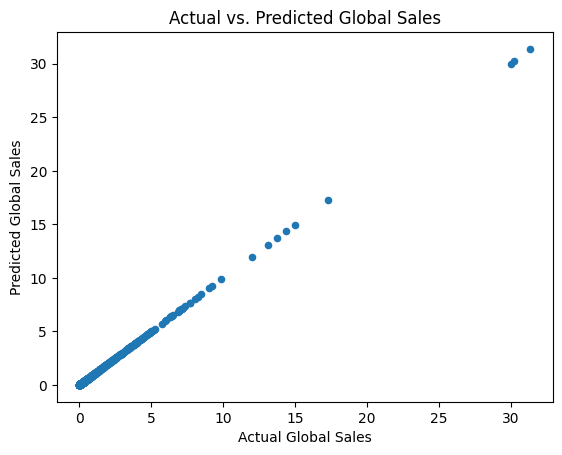

In [260]:
#Plotting the results
results.plot(x='Actual Global Sales', y='Predicted Global Sales', kind='scatter')
plt.xlabel('Actual Global Sales')
plt.ylabel('Predicted Global Sales')
plt.title('Actual vs. Predicted Global Sales')
plt.show()

In [261]:
#Saving Predicted vs Acual as a csv file
results.to_csv('/content/drive/MyDrive/Video Games Sales Data and Model/Results_v_Actuals.csv')

In [267]:
results_2.shape

(5865, 2)

In [270]:
y_test.reset_index(drop=True, inplace=True)

In [272]:
results_2 = pd.concat([y_test, predictions_df], axis=1)

In [273]:
results_2.head()

,Global_Sales,0
0,0.14,0.140413
1,0.30,0.300098
2,0.23,0.240169
3,0.10,0.100215
4,4.08,4.079837
